In [ ]:
!pip install transformers

In [ ]:
!pip install sentence-transformers

In [ ]:
!pip install joblib

In [ ]:
!pip install scipy

In [ ]:
# pip install numpy==1.26

In [ ]:
# pip install scikit-learn==1.6.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import spacy
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(np.__version__)

1.26.0


In [ ]:
dataset = pd.read_csv('resume_job_matching_dataset.csv')

In [ ]:
dataset.head()

,job_description,resume,match_score
0,"Data Analyst needed with experience in SQL, Ex...","Experienced professional skilled in SQL, Power...",4
1,Data Scientist needed with experience in Stati...,"Experienced professional skilled in Python, De...",4
2,Software Engineer needed with experience in Sy...,"Experienced professional skilled in wait, Git,...",5
3,"ML Engineer needed with experience in Python, ...","Experienced professional skilled in return, De...",4
4,Software Engineer needed with experience in RE...,"Experienced professional skilled in REST APIs,...",5


In [ ]:
dataset.describe()

,match_score
count,10000.00000
mean,3.50030
std,1.16899
min,1.00000
25%,3.00000
50%,4.00000
75%,4.00000
max,5.00000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  10000 non-null  object
 1   resume           10000 non-null  object
 2   match_score      10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
dataset.isna().any()

,0
job_description,False
resume,False
match_score,False


In [ ]:
dataset['match_score'] = [
    random.randint(1, 20) if i==1 else random.randint(21, 40) if i == 2 else random.randint(41, 60) if i == 3 else random.randint(61, 80) if i == 4 else random.randint(81, 100) for i in dataset['match_score']
]

In [ ]:
dataset.head(20)

,job_description,resume,match_score
0,"Data Analyst needed with experience in SQL, Ex...","Experienced professional skilled in SQL, Power...",70
1,Data Scientist needed with experience in Stati...,"Experienced professional skilled in Python, De...",80
2,Software Engineer needed with experience in Sy...,"Experienced professional skilled in wait, Git,...",92
3,"ML Engineer needed with experience in Python, ...","Experienced professional skilled in return, De...",76
4,Software Engineer needed with experience in RE...,"Experienced professional skilled in REST APIs,...",83
5,"Data Analyst needed with experience in Excel, ...",Experienced professional skilled in Data Clean...,37
6,Software Engineer needed with experience in RE...,Experienced professional skilled in System Des...,31
7,Product Manager needed with experience in Stak...,Experienced professional skilled in Product Ro...,60
8,"Data Analyst needed with experience in Excel, ...","Experienced professional skilled in as, choice...",77
9,"ML Engineer needed with experience in MLOps, P...","Experienced professional skilled in author, Co...",25


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
resumes = dataset['resume'].tolist()
texts = dataset['job_description'].tolist()

In [ ]:
resume_emb = model.encode(resumes, convert_to_tensor=True, batch_size = 64)
text_emb = model.encode(texts, convert_to_tensor=True, batch_size = 64)

In [ ]:
resume_emb.shape

torch.Size([10000, 384])

In [ ]:
text_emb.shape

torch.Size([10000, 384])

In [ ]:
pair =  []
for i in range(len(resume_emb)):
  score = util.cos_sim(resume_emb[i], text_emb[i]).item()
  matc_score = round(score * 100, 2 )
  pair.append((resumes[i], texts[i] , matc_score))



In [ ]:
dataset_similarity  = pd.DataFrame(pair, columns=["Resume", "Job", "Match Score"])
dataset_similarity.to_csv('similarity_scores.csv', index=False)

In [ ]:
dataset_similarity.head(20)

,Resume,Job,Match Score
0,"Experienced professional skilled in SQL, Power...","Data Analyst needed with experience in SQL, Ex...",65.24
1,"Experienced professional skilled in Python, De...",Data Scientist needed with experience in Stati...,37.27
2,"Experienced professional skilled in wait, Git,...",Software Engineer needed with experience in Sy...,44.79
3,"Experienced professional skilled in return, De...","ML Engineer needed with experience in Python, ...",51.65
4,"Experienced professional skilled in REST APIs,...",Software Engineer needed with experience in RE...,45.13
5,Experienced professional skilled in Data Clean...,"Data Analyst needed with experience in Excel, ...",44.85
6,Experienced professional skilled in System Des...,Software Engineer needed with experience in RE...,43.00
7,Experienced professional skilled in Product Ro...,Product Manager needed with experience in Stak...,53.88
8,"Experienced professional skilled in as, choice...","Data Analyst needed with experience in Excel, ...",47.23
9,"Experienced professional skilled in author, Co...","ML Engineer needed with experience in MLOps, P...",40.06


In [ ]:
cos_sim_score = util.cos_sim(resume_emb, text_emb).diagonal().cpu().numpy()

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit(dataset['resume'].tolist() +  dataset['job_description'].tolist())

resume_tfidf = vectorizer.transform(dataset['resume'].tolist())
job_tfidf = vectorizer.transform(dataset['job_description'].tolist())

In [ ]:
tfidf_sim = []
for i in range(len(dataset)):
  score = cosine_similarity(resume_tfidf[i], job_tfidf[i])[0][0]
  tfidf_sim.append(score)

In [ ]:
def keyword_overlap(resume, job_description):
  resume_words = set(resume.split())
  job_words = set(job_description.split())
  return len(resume_words & job_words) / (len(job_words) + 1e-5)

In [ ]:
dataset["overlap"] = dataset.apply(lambda x: keyword_overlap(x["resume"], x["job_description"]), axis=1)

In [ ]:
dataset["resume_length"] = dataset["resume"].apply(lambda x: len(x.split()))
dataset["job_length"] = dataset["job_description"].apply(lambda x: len(x.split()))
dataset["ratio_len"] = dataset["resume_length"] / (dataset["job_length"] + 1e-5)

In [ ]:
dataset.head(20)

,job_description,resume,match_score,overlap,resume_length,job_length,ratio_len
0,"Data Analyst needed with experience in SQL, Ex...","Experienced professional skilled in SQL, Power...",70,0.272727,27,23,1.173913
1,Data Scientist needed with experience in Stati...,"Experienced professional skilled in Python, De...",80,0.156250,33,33,1.000000
2,Software Engineer needed with experience in Sy...,"Experienced professional skilled in wait, Git,...",92,0.181818,31,22,1.409090
3,"ML Engineer needed with experience in Python, ...","Experienced professional skilled in return, De...",76,0.103448,30,29,1.034482
4,Software Engineer needed with experience in RE...,"Experienced professional skilled in REST APIs,...",83,0.320000,24,25,0.960000
5,"Data Analyst needed with experience in Excel, ...",Experienced professional skilled in Data Clean...,37,0.217391,26,24,1.083333
6,Software Engineer needed with experience in RE...,Experienced professional skilled in System Des...,31,0.147059,27,34,0.794117
7,Product Manager needed with experience in Stak...,Experienced professional skilled in Product Ro...,60,0.121212,20,34,0.588235
8,"Data Analyst needed with experience in Excel, ...","Experienced professional skilled in as, choice...",77,0.148148,22,28,0.785714
9,"ML Engineer needed with experience in MLOps, P...","Experienced professional skilled in author, Co...",25,0.045455,29,23,1.260869


# model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
resume_embeddings = model.encode(dataset_similarity['Resume'].tolist(), batch_size=16, convert_to_numpy=True)
job_embeddings = model.encode(dataset_similarity['Job'].tolist(), batch_size=16, convert_to_numpy=True)

In [ ]:
resume_embeddings.shape

(10000, 384)

In [ ]:
job_embeddings.shape

(10000, 384)

In [ ]:
X = np.hstack([
    cos_sim_score.reshape(-1, 1),
    np.array(tfidf_sim).reshape(-1, 1),
    dataset['overlap'].values.reshape(-1, 1),
    dataset['resume_length'].values.reshape(-1, 1),
    dataset['job_length'].values.reshape(-1, 1),
    dataset['ratio_len'].values.reshape(-1, 1)
])
y = dataset['match_score'].values

In [ ]:
print(X.shape)

(10000, 6)


In [ ]:
print(len(dataset))

10000


In [ ]:
y.shape

(10000,)

In [ ]:
print(len(cos_sim_score))
print(len(tfidf_sim))
print(dataset['overlap'].shape)
print(dataset['resume_length'].shape)
print(dataset['job_length'].shape)
print(dataset['ratio_len'].shape)

10000
10000
(10000,)
(10000,)
(10000,)
(10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("MSE: ", mse)

MSE:  246.32209799551765


In [ ]:
print("R-score: ", r2)

R-score:  0.5751165143998698


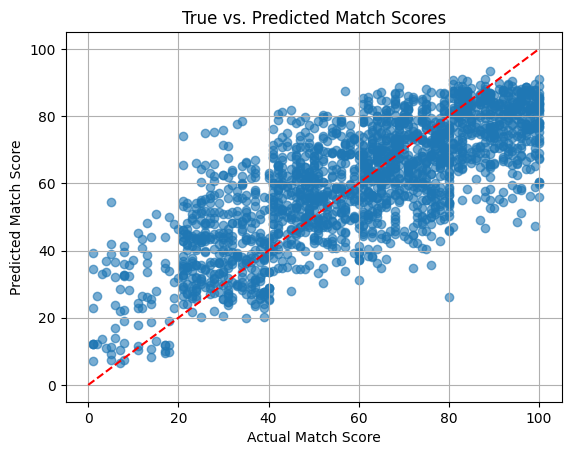

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Match Score")
plt.ylabel("Predicted Match Score")
plt.title("True vs. Predicted Match Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid(True)
plt.show()

In [ ]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

joblib.dump(regressor, 'models/resume_matcher_metadata.pkl')

['models/resume_matcher_metadata.pkl']

# xboost regressor

In [ ]:
pip install XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state = 42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
msex = mean_squared_error(y_test, y_pred_xgb)
r2x = r2_score(y_test, y_pred_xgb)

In [ ]:
print(msex)

264.0303649902344


In [ ]:
print(r2x)

0.5445713400840759


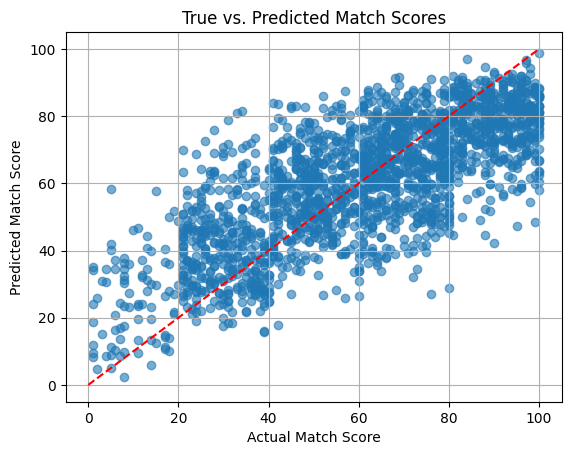

In [ ]:
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.xlabel("Actual Match Score")
plt.ylabel("Predicted Match Score")
plt.title("True vs. Predicted Match Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid(True)
plt.show()

#lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state = 42,
    n_jobs = -1)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score 60.317000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=1,
              n_estimators=500, n_jobs=-1, random_state=42, subsample=0.8)

In [ ]:
y_pred_light = lgb_model.predict(X_test)

In [ ]:
msel = mean_squared_error(y_test, y_pred_light)
r2l = r2_score(y_test, y_pred_light)

In [ ]:
print(msel)

254.12753084854654


In [ ]:
print(r2l)

0.5616528440909516


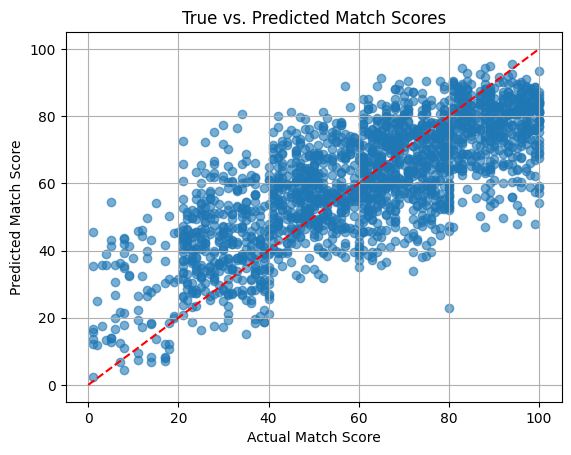

In [ ]:
plt.scatter(y_test, y_pred_light, alpha=0.6)
plt.xlabel("Actual Match Score")
plt.ylabel("Predicted Match Score")
plt.title("True vs. Predicted Match Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid(True)
plt.show()

# compare models

In [ ]:
import time

In [ ]:
# models = {
#     'Random Forest': RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=20),
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state = 42),
#     'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample = 0.8, colsample_bytree=0.8, random_state = 42, n_jobs=-1),
#     'LightGBM': lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, num_leaves=31, subsample = 0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
# }
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor()
}


In [ ]:
results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    duration = time.time() - start

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "model": name,
        "mse": round(mse, 3),
        "r2": round(r2, 3),
        "Time(s)": round(duration, 2)
    })


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score 60.317000


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               model      mse     r2  Time(s)
0      Random Forest  265.936  0.541     8.84
1  Gradient Boosting  246.242  0.575     2.12
2            XGBoost  278.970  0.519     0.39
3           LightGBM  252.492  0.564     0.18


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               model      mse     r2  Time(s)
0      Random Forest  265.936  0.541     8.84
1  Gradient Boosting  246.242  0.575     2.12
2            XGBoost  278.970  0.519     0.39
3           LightGBM  252.492  0.564     0.18


# hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
param_features = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10, 15, 20],
    'num_leaves': [31, 50, 70, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [10, 20, 30, 50]
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_features,
    n_iter=50,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score 60.317000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 15, 20],
                                        'min_child_samples': [10, 20, 30, 50],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [31, 50, 70, 100, 150],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 50, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score found:  0.5724619229750325


In [ ]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [ ]:
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

In [ ]:
print("R2 score: ", r2_best)
print("MSE: ", mse_best)

R2 score:  0.5756299811807644
MSE:  246.02442058745766


In [ ]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
# os.makedirs('models', exist_ok=True)

joblib.dump(regressor, 'models/resume_matcher_lightgbm.pkl')

['models/resume_matcher_lightgbm.pkl']